### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from tqdm import tqdm

### 1. Deriving function

To use Monte Carlo Integration, I use the following distribution, that corresponds to an half - gaussian:

\begin{equation}
    \frac{\sqrt{2}}{\sqrt{\pi}\sigma}\int_{0}^{\infty} \exp{\left(-\frac{x^2}{2\sigma^2}\right)}\,dx = 1
\end{equation}

Therefore, the remaining function in the integral is equal to $y = \frac{\sqrt{\pi}\sigma}{\sqrt{2}}x^3$, where I included the distribution normalization.

In [2]:
def function(x, s):
    return x**3*np.sqrt(np.pi)*s/np.sqrt(2)

### 2. Testing for different $\sigma$

Once I have my function and the distribution from which I have to sample, I can check the relation: $$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$


In [3]:
sigma = np.linspace(1, 1000)  
N = int(1e5)

In [4]:
rapporto = []
for s in tqdm(sigma):
    gauss = scipy.stats.halfnorm(loc = 0 , scale=s)
    draws = gauss.rvs(N)    
    integral = np.mean(function(draws, s))
    
    rapporto.append(integral/(2*s**4))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.05it/s]


Therefore, after sampling values from an half gaussian distribution, computing the integral for each sample and the corresponding mean value, I can evaluate the fluctuactions with respect to a 1:1 ratio from the numerical result of the integral and the expression 2$\sigma^4$.

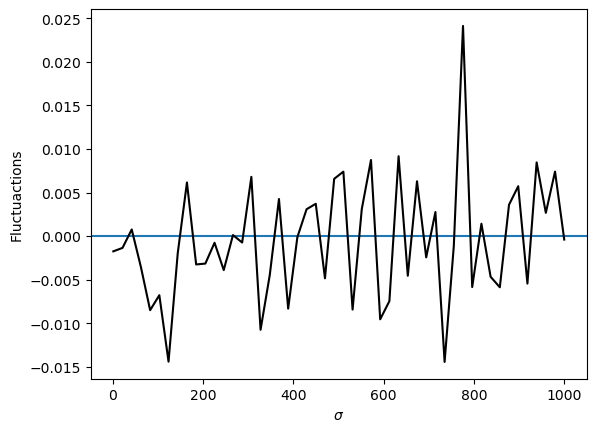

In [5]:
rapporto = np.array(rapporto)
plt.axhline(0)
plt.plot(sigma, 1-rapporto, color = 'black')
plt.xlabel(r'$\sigma$')
plt.ylabel('Fluctuactions')
plt.show()

As we can derive from this plot, the integral value actually converges to the value $2\sigma^4$.

### 3. Testing for different N

However, we can aks ourselves how the errors change with respect to the sampling size. Therefore, we keep now a fixed value for $\sigma$ and study how the error on the integral value goes with respect to the samples size.

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 126.42it/s]


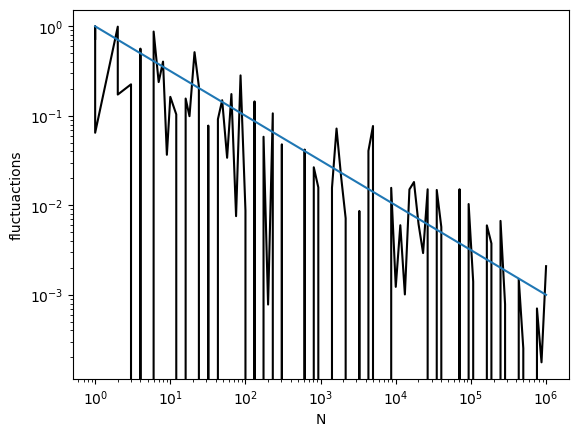

In [6]:
sigma = 0.5
Nvals = np.logspace(0,6,100,dtype=int)

rapporto = []
for n in tqdm(Nvals):
    gauss = scipy.stats.halfnorm(loc = 0 , scale=sigma)
    draws = gauss.rvs(n)    
    integral = np.mean(function(draws, sigma))
    
    rapporto.append(integral/(2*sigma**4)) 
    
rapporto = np.array(rapporto)
plt.axhline(0)
plt.plot(Nvals, 1-rapporto, color = 'black')
plt.xlabel('N')
plt.ylabel('fluctuactions')
plt.plot(Nvals, 1/np.sqrt(Nvals))
plt.loglog()
plt.show()

As we expected, a larger number of samples allows for a more accurate and precised computation of the integral value. Furthermore, we can observe that the error follows a gaussian distribution, for which $\sigma_{mean} = \frac{\sigma}{\sqrt{N}}$.

To check that the errors follow a gaussian distribution, we can do different realizations for a fixed sampling size N, saving the errors and overplot to the resulting histogram of the errors the corresponding gaussian - where $\mu$ is given by the mean of the errors and $\sigma$ by their standard deviation.

In [7]:
rapporto = []
Nerr = 5000
for n in tqdm(range(Nerr)):
    gauss = scipy.stats.halfnorm(loc = 0 , scale=sigma)
    draws = gauss.rvs(N)    
    integral = np.mean(function(draws,sigma))
    
    rapporto.append(integral/(2*sigma**4))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:41<00:00, 119.98it/s]


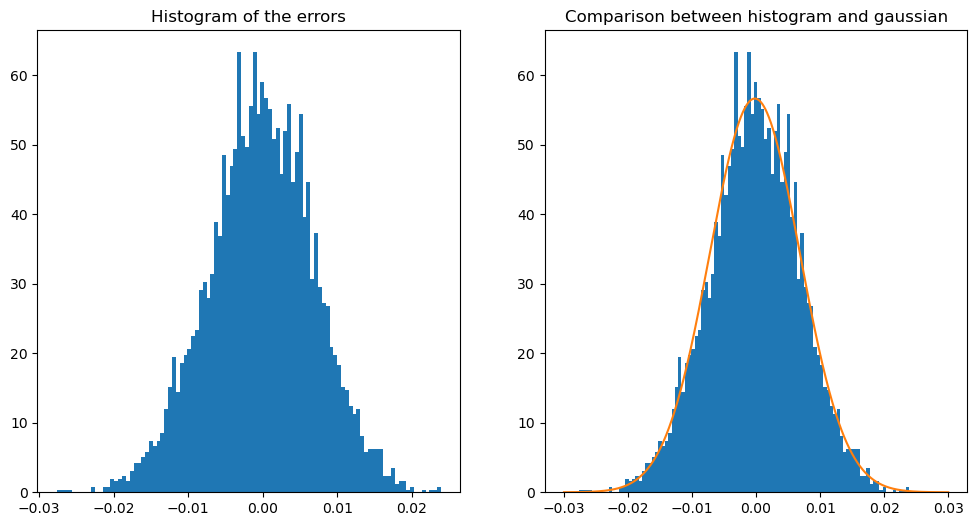

In [8]:
rapporto = np.array(rapporto)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.hist(1-rapporto, bins = 100, density = True)
plt.title('Histogram of the errors');

mean = np.average(1-rapporto)
std = np.std(1-rapporto, ddof=1)

ax = fig.add_subplot(122)

plt.hist(1-rapporto,density=True, bins=100);
gauss = scipy.stats.norm(loc=mean,scale=std)
x = np.linspace(-0.03,0.03,1000)
plt.plot(x,gauss.pdf(x))
plt.title('Comparison between histogram and gaussian');

Comparing the standard deviation of the errors and the value obtained from $\sigma/\sqrt{N_{err}}$, we get that they are basically the same:

In [9]:
print('Comparison between standard deviation and gaussian mean error: %.05f, %.05f' %(std, sigma/np.sqrt(Nerr)))

Comparison between standard deviation and gaussian mean error: 0.00705, 0.00707
